In [1]:
#### Data cleaning the new data ####

In [1]:
import pandas as pd #data processing
import numpy as np #calculate stuff
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization

In [2]:
pokemon_df = pd.read_csv('pokemon.csv')
combats_df = pd.read_csv('combats.csv')
test_df = pd.read_csv('tests.csv')
prediction_df = test_df.copy()

In [3]:
#Getting a sense of the data
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
#Getting a sense of the data
pokemon_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
#Here we foun thtat there is a name missing
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
pokemon_df.loc[pokemon_df['Name'].isnull()==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [7]:
type_1_list=list(pokemon_df['Type 1'].value_counts().index)
type_2_list=list(pokemon_df['Type 2'].value_counts().index)



['Flying',
 'Ground',
 'Poison',
 'Psychic',
 'Fighting',
 'Grass',
 'Fairy',
 'Steel',
 'Dark',
 'Dragon',
 'Ice',
 'Water',
 'Ghost',
 'Rock',
 'Fire',
 'Electric',
 'Normal',
 'Bug']

In [8]:
pokemon_df['Total_stats'] = pokemon_df['HP'] + pokemon_df['Attack'] + pokemon_df['Defense'] + pokemon_df['Sp. Atk'] + pokemon_df['Sp. Def'] + pokemon_df['Speed']

In [9]:
#We found the name by searching online
pokemon_df['Type 2'] = pokemon_df['Type 2'].fillna('None')
pokemon_df['Name'] = pokemon_df['Name'].fillna('Primeape')

#some type is named 'Fight', and some named 'Fighting'. This code is to clean it up.
pokemon_df['Type 1'] = pokemon_df['Type 1'].replace('Fighting', 'Fight')
pokemon_df['Type 2'] = pokemon_df['Type 2'].replace('Fighting', 'Fight')

#changing true/false to 1/0 in Legendary column
pokemon_df['Legendary'] = pokemon_df['Legendary'].map({False: 0, True:1})

In [10]:
#Creating a data frame containing the first 4 columns of the initial data frame without 'Name'
type_df = pokemon_df.iloc[:, 0:4]
type_df = type_df.drop('Name', axis=1)


In [11]:
# Creating a data frame without these columns. We just want the stat of the pokemon
stats_df = pokemon_df.drop(['Type 1', 'Type 2', 'Name', 'Generation', 'Total_stats'], axis=1)

In [12]:
#Creating a dictionnary. One containing the number which will represent the type. the other one contains the number of the
#pokemon but represent the stats
type_dict = type_df.set_index('#').T.to_dict('list')
stats_dict = stats_df.set_index('#').T.to_dict('list')

type_dict
#stats_dict

{1: ['Grass', 'Poison'],
 2: ['Grass', 'Poison'],
 3: ['Grass', 'Poison'],
 4: ['Grass', 'Poison'],
 5: ['Fire', 'None'],
 6: ['Fire', 'None'],
 7: ['Fire', 'Flying'],
 8: ['Fire', 'Dragon'],
 9: ['Fire', 'Flying'],
 10: ['Water', 'None'],
 11: ['Water', 'None'],
 12: ['Water', 'None'],
 13: ['Water', 'None'],
 14: ['Bug', 'None'],
 15: ['Bug', 'None'],
 16: ['Bug', 'Flying'],
 17: ['Bug', 'Poison'],
 18: ['Bug', 'Poison'],
 19: ['Bug', 'Poison'],
 20: ['Bug', 'Poison'],
 21: ['Normal', 'Flying'],
 22: ['Normal', 'Flying'],
 23: ['Normal', 'Flying'],
 24: ['Normal', 'Flying'],
 25: ['Normal', 'None'],
 26: ['Normal', 'None'],
 27: ['Normal', 'Flying'],
 28: ['Normal', 'Flying'],
 29: ['Poison', 'None'],
 30: ['Poison', 'None'],
 31: ['Electric', 'None'],
 32: ['Electric', 'None'],
 33: ['Ground', 'None'],
 34: ['Ground', 'None'],
 35: ['Poison', 'None'],
 36: ['Poison', 'None'],
 37: ['Poison', 'Ground'],
 38: ['Poison', 'None'],
 39: ['Poison', 'None'],
 40: ['Poison', 'Ground'],
 41:

In [23]:
#changing winner to 0 and 1.

combats_df.Winner[combats_df.Winner == combats_df.First_pokemon] = 0
combats_df.Winner[combats_df.Winner == combats_df.Second_pokemon] = 1

In [24]:
def replace_things(data):
    #Mapping the number by pokemon stats and types
    
    data['First_pokemon_stats'] = data.First_pokemon.map(stats_dict)
    data['Second_pokemon_stats'] = data.Second_pokemon.map(stats_dict)

    data['First_pokemon'] = data.First_pokemon.map(type_dict)
    data['Second_pokemon'] = data.Second_pokemon.map(type_dict)

    return data

In [25]:
def calculate_stats(data):
    #calculate stats difference
    
    stats_col = ['HP_diff', 'Attack_diff', 'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff', 'Legendary_diff']
    diff_list = []

    for row in data.itertuples():
        diff_list.append(np.array(row.First_pokemon_stats) - np.array(row.Second_pokemon_stats))

    stats_df = pd.DataFrame(diff_list, columns=stats_col)
    data = pd.concat([data, stats_df], axis=1)
    data.drop(['First_pokemon_stats', 'Second_pokemon_stats'], axis=1, inplace=True)

    return data

In [26]:
def calculate_effectiveness(data):

    '''
        this function creates a new column of each pokemon's effectiveness against it's enemy.
        every effectiveness starts with 1, if an effective type is found on enemy's type, effectiveness * 2
        if not very effective is found on enemy's type, effectiveness / 2
        if not effective is found on enemy's type, effectiveness * 0
        
        This function creates 4 new columns
            1. P1_type1, pokemon 1 first type effectiveness against the enemy's type
            2. P1_type2, pokemon 1 second type effectiveness against the enemy's type
            3. P2_type1, pokemon 2 first type effectiveness against the enemy's type
            4. P2_type2, pokemon 2 second type effectiveness against the enemy's type
    '''
    
    very_effective_dict = {'Normal': [],
                           'Fight': ['Normal', 'Rock', 'Steel', 'Ice', 'Dark'],
                           'Flying': ['Fight', 'Bug', 'Grass'],
                           'Poison': ['Grass', 'Fairy'],
                           'Ground': ['Poison', 'Rock', 'Steel', 'Fire', 'Electric'],
                           'Rock': ['Flying', 'Bug', 'Fire', 'Ice'],
                           'Bug': ['Grass', 'Psychic', 'Dark'],
                           'Ghost': ['Ghost', 'Psychic'],
                           'Steel': ['Rock', 'Ice', 'Fairy'],
                           'Fire': ['Bug', 'Steel', 'Grass', 'Ice'],
                           'Water': ['Ground', 'Rock', 'Fire'],
                           'Grass': ['Ground', 'Rock', 'Water'],
                           'Electric': ['Flying', 'Water'],
                           'Psychic': ['Fight', 'Poison'],
                           'Ice': ['Flying', 'Ground', 'Grass', 'Dragon'],
                           'Dragon': ['Dragon'],
                           'Dark': ['Ghost', 'Psychic'],
                           'Fairy': ['Fight', 'Dragon', 'Dark'],
                           'None': []}

    not_very_effective_dict = {'Normal': ['Rock', 'Steel'],
                               'Fight': ['Flying', 'Poison', 'Bug', 'Psychic', 'Fairy'],
                               'Flying': ['Rock', 'Steel', 'Electric'],
                               'Poison': ['Poison', 'Rock', 'Ground', 'Ghost'],
                               'Ground': ['Bug', 'Grass'],
                               'Rock': ['Fight', 'Ground', 'Steel'],
                               'Bug': ['Fight', 'Flying', 'Poison', 'Ghost', 'Steel', 'Fire', 'Fairy'],
                               'Ghost': ['Dark'],
                               'Steel': ['Steel', 'Fire', 'Water', 'Electric'],
                               'Fire': ['Rock', 'Fire', 'Water', 'Dragon'],
                               'Water': ['Water', 'Grass', 'Dragon'],
                               'Grass': ['Flying', 'Poison', 'Bug', 'Steel', 'Fire', 'Grass', 'Dragon'],
                               'Electric': ['Grass', 'Electric', 'Dragon'],
                               'Psychic': ['Steel', 'Psychic'],
                               'Ice': ['Steel', 'Fire', 'Water', 'Psychic'],
                               'Dragon': ['Steel'],
                               'Dark': ['Fight', 'Dark', 'Fairy'],
                               'Fairy': ['Posion', 'Steel', 'Fire'],
                               'None': []}

    not_effective_dict = {'Normal': ['Ghost'],
                          'Fight': ['Ghost'],
                          'Flying': [],
                          'Poison': ['Steel'],
                          'Ground': ['Flying'],
                          'Rock': [],
                          'Bug': [],
                          'Ghost': ['Normal'],
                          'Steel': [],
                          'Fire': [],
                          'Water': [],
                          'Grass': [],
                          'Electric': ['Ground'],
                          'Psychic': ['Dark'],
                          'Ice': [],
                          'Dragon': ['Fairy'],
                          'Dark': [],
                          'Fairy': [],
                          'None': []}

    p1_type1_list = []
    p1_type2_list = []
    p2_type1_list = []
    p2_type2_list = []

    for row in data.itertuples():
        nested_type = [[1, 1], [1, 1]]

        #manipulating values if found on dictionary
        for i in range(0,2):
            for j in range(0,2):
                if row.Second_pokemon[j] in very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 2
                if row.Second_pokemon[j] in not_very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] /= 2
                if row.Second_pokemon[j] in not_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 0

                if row.First_pokemon[j] in very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 2
                if row.First_pokemon[j] in not_very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] /= 2
                if row.First_pokemon[j] in not_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 0

        p1_type1_list.append(nested_type[0][0])
        p1_type2_list.append(nested_type[0][1])
        p2_type1_list.append(nested_type[1][0])
        p2_type2_list.append(nested_type[1][1])

    data = data.assign(P1_type1=p1_type1_list, P1_type2=p1_type2_list, P2_type1=p2_type1_list, P2_type2=p2_type2_list)
    data = data.drop(['First_pokemon', 'Second_pokemon'], axis=1)

    return data

In [27]:
#this is how my data rame will loook after using the first function
train_df = replace_things(combats_df)
print(train_df.head(5))
print('Each value on the list corresponds to HP, atk, def, sp.atk, sp.def, speed and legendary')

     First_pokemon   Second_pokemon  Winner            First_pokemon_stats  \
0   [Rock, Ground]    [Grass, Dark]       1    [50, 64, 50, 45, 50, 41, 0]   
1   [Grass, Fight]    [Rock, Fight]       1  [91, 90, 72, 90, 129, 108, 1]   
2  [Fairy, Flying]  [Psychic, None]       1   [55, 40, 85, 80, 105, 40, 0]   
3     [Fire, None]   [Dragon, None]       1    [40, 40, 40, 70, 40, 20, 0]   
4    [Rock, Water]      [Bug, Rock]       0  [70, 60, 125, 115, 70, 55, 0]   

            Second_pokemon_stats  
0    [70, 70, 40, 60, 40, 60, 0]  
1  [91, 129, 90, 72, 90, 108, 1]  
2   [75, 75, 75, 125, 95, 40, 0]  
3   [77, 120, 90, 60, 90, 48, 0]  
4   [20, 10, 230, 10, 230, 5, 0]  
Each value on the list corresponds to HP, atk, def, sp.atk, sp.def, speed and legendary


In [28]:
#this is how the data frame will look after using the second data frame
train_df = calculate_stats(train_df)
print(train_df.head(5))
print('Each first pokemon\'s stats are then subtracted by the second pokemon\'s stats')
print('Positive values implies the first pokemon has higher stats and vice versa.')

     First_pokemon   Second_pokemon  Winner  HP_diff  Attack_diff  \
0   [Rock, Ground]    [Grass, Dark]       1      -20           -6   
1   [Grass, Fight]    [Rock, Fight]       1        0          -39   
2  [Fairy, Flying]  [Psychic, None]       1      -20          -35   
3     [Fire, None]   [Dragon, None]       1      -37          -80   
4    [Rock, Water]      [Bug, Rock]       0       50           50   

   Defense_diff  Sp.Atk_diff  Sp.Def_diff  Speed_diff  Legendary_diff  
0            10          -15           10         -19               0  
1           -18           18           39           0               0  
2            10          -45           10           0               0  
3           -50           10          -50         -28               0  
4          -105          105         -160          50               0  
Each first pokemon's stats are then subtracted by the second pokemon's stats
Positive values implies the first pokemon has higher stats and vice versa.


In [29]:
#this is how the data will look after using the third funtion
train_df = calculate_effectiveness(train_df)
print(train_df.head())

   Winner  HP_diff  Attack_diff  Defense_diff  Sp.Atk_diff  Sp.Def_diff  \
0       1      -20           -6            10          -15           10   
1       1        0          -39           -18           18           39   
2       1      -20          -35            10          -45           10   
3       1      -37          -80           -50           10          -50   
4       0       50           50          -105          105         -160   

   Speed_diff  Legendary_diff  P1_type1  P1_type2  P2_type1  P2_type2  
0         -19               0       1.0       0.5       4.0       1.0  
1           0               0       2.0       2.0       0.5       1.0  
2           0               0       1.0       1.0       1.0       1.0  
3         -28               0       0.5       1.0       1.0       1.0  
4          50               0       2.0       2.0       1.0       1.0  


In [30]:
#Our target variable is whether the first pokemon won or th second
y_train_full = train_df['Winner']
#this will be predicted using the difference between stats, and type advantages
x_train_full = train_df.drop('Winner', axis=1)

#Splitting the data set into 25% testing and 75% training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_full, y_train_full, test_size=0.25, random_state=42)

In [31]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the model
classifier = DecisionTreeClassifier()

# fit the model with data
classifier.fit(x_train, y_train)
#Accuracy
classifier.score(x_test,y_test)

0.94256

Text(0.5, 15.0, 'Predicted label')

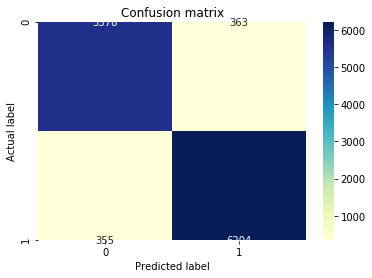

In [32]:
from sklearn import metrics
#y_pred will contain the pokemon that were predicted as legendary by the model
y_pred = classifier.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5941
           1       0.94      0.95      0.95      6559

    accuracy                           0.94     12500
   macro avg       0.94      0.94      0.94     12500
weighted avg       0.94      0.94      0.94     12500



In [34]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#Accuracy
logreg.score(x_test,y_test)

C:\Users\keven\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.88112

Text(0.5, 15.0, 'Predicted label')

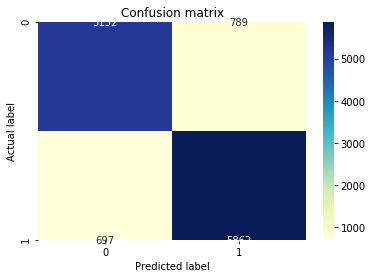

In [35]:
#y_pred will contain the pokemon that were predicted as legendary by the model
y_pred = logreg.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5941
           1       0.88      0.89      0.89      6559

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



In [37]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the model
classifier1 = RandomForestClassifier()

# fit the model with data
classifier1.fit(x_train, y_train)

#Accuracy
classifier1.score(x_test,y_test)

C:\Users\keven\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9592

Text(0.5, 15.0, 'Predicted label')

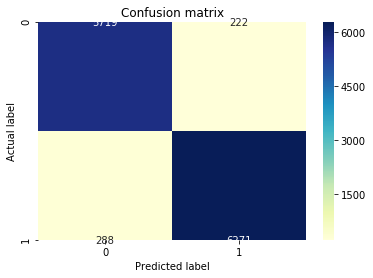

In [38]:
#y_pred will contain the pokemon that were predicted as legendary by the model
y_pred = classifier1.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5941
           1       0.97      0.96      0.96      6559

    accuracy                           0.96     12500
   macro avg       0.96      0.96      0.96     12500
weighted avg       0.96      0.96      0.96     12500



In [44]:
test_df=replace_things(test_df)
test_df=calculate_stats(test_df)
test_df=calculate_effectiveness(test_df)
print(test_df.head())


   HP_diff  Attack_diff  Defense_diff  Sp.Atk_diff  Sp.Def_diff  Speed_diff  \
0      -10           37           -10            5            5          38   
1      -21            9            46          -11           51         -15   
2       29          -15            17          110          -30          14   
3       -5          -31           -12          -26           -7         -15   
4     -125          -15           -50           -9          -14           5   

   Legendary_diff  P1_type1  P1_type2  P2_type1  P2_type2  
0               0       1.0       1.0       1.0       1.0  
1               0       4.0       0.5       0.5       1.0  
2               1       1.0       2.0       0.5       1.0  
3               0       0.5       1.0       1.0       1.0  
4               0       1.0       1.0       1.0       1.0  


In [45]:
classifier=RandomForestClassifier(n_estimators=100)
model=classifier.fit(x_train_full,y_train_full)
prediction=model.predict(test_df)

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [47]:
prediction_df['Winner']=prediction
prediction_df['Winner'][prediction_df['Winner']==0]=prediction_df['First_pokemon']
prediction_df['Winner'][prediction_df['Winner']==1]=prediction_df['Second_pokemon']
print(prediction_df)

      First_pokemon  Second_pokemon  Winner
0               129             117     129
1               660             211     211
2               706             115     706
3               195             618     618
4                27             656      27
...             ...             ...     ...
9995            216             498     498
9996            113             404     404
9997            493             104     493
9998            643             259     643
9999            678             531     531

[10000 rows x 3 columns]
